<h1 align="center">Training a Linear Regression Model in PyTorch</h1>

Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

Link de estudo:

* [Machine Learning Mastery: PhD.:Jason Brownlee](https://machinelearningmastery.com/training-a-linear-regression-model-in-pytorch/)

A `Regressão Linear` é uma técnica simples, porém poderosa, para prever os valores de variáveis ​​com base em outras variáveis. É frequentemente usado para modelar relações entre duas ou mais <font color="yellow">variáveis ​​contínuas</font>, como a relação entre `renda` e `idade` ou a relação entre `peso` e `altura`. Da mesma forma, a regressão linear pode ser usada para <font color="yellow">prever resultados contínuos</font>, como demanda de preço ou quantidade, com base em outras variáveis ​​conhecidas por influenciar esses resultados.

Para treinar um modelo de regressão linear, precisamos definir uma `função de custo` e um `otimizador`. <font color="yellow">A função de custo é usada para medir o quão bem nosso modelo ajusta os dados</font>, enquanto o otimizador decide em qual direção se mover para melhorar esse ajuste.

Aqui você treinará um modelo de regressão linear e atualizará seus parâmetros de aprendizado usando o `PyTorch`. Nós aprenderemos:

* Como você pode criar um modelo de regressão linear simples do zero no `PyTorch`.

* Como você pode aplicar um modelo de regressão linear simples em um conjunto de dados.

* Como um modelo de regressão linear simples pode ser treinado em um único parâmetro que pode ser aprendido.

* Como um modelo de regressão linear simples pode ser treinado em dois parâmetros que podem ser aprendidos.

# Preparando nosso Dados


Vamos importar algumas bibliotecas que usaremos neste tutorial e criar alguns dados para nossos experimentos.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Usaremos dados sintéticos para treinar o modelo de regressão linear. Vamos inicializar uma variável `X` com valores de $-5$ até $5$ e crie uma função linear que tenha uma inclinação de $-5$. Observe que essa função será estimada por nosso modelo treinado posteriormente.

In [2]:
# Creating a function f(X) with a slope of -5
x = torch.arange(-5, 5, 0.1).view(-1, 1)
y = -5 * x

Além disso, veremos como nossos dados se parecem em um gráfico de linha, usando `matplotlib`.

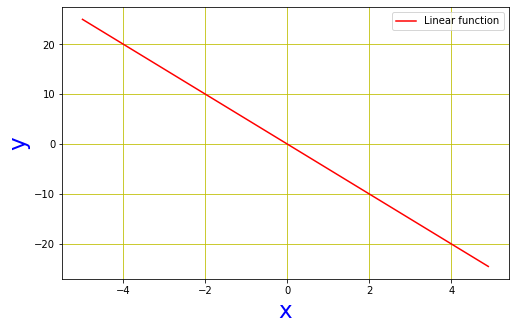

In [3]:
# Plot the line in red with grids
plt.figure(figsize=(8, 5))
plt.plot(x.numpy(), y.numpy(), 'r', label='Linear function')
plt.xlabel('x', size=23, c='b')
plt.ylabel('y', size=23, c='b')
plt.legend()
plt.grid('True', color='y')
plt.show()

Como precisamos simular os dados reais que acabamos de criar, vamos adicionar algum `ruído Gaussiano` a eles para criar dados ruidosos do mesmo tamanho que `x`, mantendo o valor do `desvio padrão` em $0.4$. Isso será feito usando `torch.randn(x.size())`.

In [4]:
# Adding Gaussian noise to the function f(X) and saving it in Y
Y = y + 0.4 * torch.randn(x.size())

Agora, vamos visualizar esses pontos de dados usando as linhas de código abaixo.

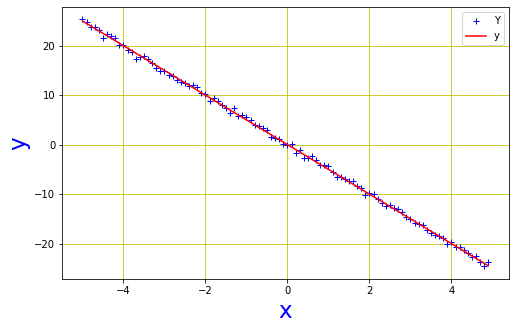

In [7]:
# Plot and visualizing the data points in blue
plt.figure(figsize=(8, 5))
plt.plot(x.numpy(), Y.numpy(), 'b+', label='Y')
plt.plot(x.numpy(), y.numpy(), 'r', label='y')
plt.xlabel('x', size=23, c='b')
plt.ylabel('y', size=23, c='b')
plt.legend()
plt.grid('True', color='y')
plt.show()

Juntando tudo, temos:

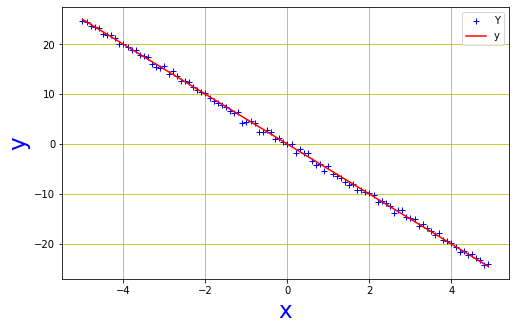

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt
 
# Creating a function f(X) with a slope of -5
x = torch.arange(-5, 5, 0.1).view(-1, 1)
y = -5 * x
 
# Adding Gaussian noise to the function f(X) and saving it in Y
Y = y + 0.4 * torch.randn(x.size())
 
# Plot and visualizing the data points in blue
plt.figure(figsize=(8, 5))
plt.plot(x.numpy(), Y.numpy(), 'b+', label='Y')
plt.plot(x.numpy(), y.numpy(), 'r', label='y')
plt.xlabel('x', size=23, c='b')
plt.ylabel('y', size=23, c='b')
plt.legend()
plt.grid('True', color='y')
plt.show()

# Construindo o Modelo e a função Loss 

Criamos os dados para alimentar o modelo, em seguida, construiremos uma função direta com base em uma `equação de regressão linear simples`. Observe que construiremos o modelo para treinar apenas um único parâmetro ($w$) aqui. Posteriormente, na seguinte seção, adicionaremos o `viés` (bias) e treinaremos o modelo para dois parâmetros ($w$ e $b$). A função para o `forward pass` do modelo é definida da seguinte forma:

In [10]:
# Defining the function for forward pass for prediction
def forward(x):
    return w * x

Nas etapas de treinamento, precisaremos de um critério para medir a Loss entre os pontos de `dados originais` e `previstos`. Esta informação é crucial para as operações de otimização do `gradiente descendente` do modelo e atualizada após cada iteração, a fim de calcular os gradientes e minimizar a Loss. Normalmente, a regressão linear é usada para dados contínuos onde o `Erro Quadrado Médio` (`MSE`) calcula efetivamente a Loss do modelo. Portanto, a métrica `MSE` é a função de critério que usamos aqui.

In [11]:
# Evaluating data points with Mean Square Error.
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)